In [ ]:
! pip install db-sqlite3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 171 kB 7.3 MB/s 
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1794 sha256=d4a8562ebc29c4d50690ef1a0c1337622a80aeb06eed8da1fc1faaba96d58787
  Stored in directory: /root/.cache/pip/wheels/02/38/d5/2f54461050571bf5330fee2a37ab1c9b5e7540b0572f1acdab
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3895 sha256=9301c34f7db342a1e17650242c5bcf5d60e4a6744ffb918f3bab9ad645d75e47
  Stored in directory: /root/.cache/pip/wheels/8e/97/82/741d2b360507411ec233d0280d7371faa94b03bde834e4a9be
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31679 sha256=a6ba9c6cabd3e5d90defe67d967649bd46eb8786ad0fca06cced64e9d5af628e
  Stored in directory: /root/.cache/pip/wheels/c5/43/70/e9729370cfff40c49d3e3d05377d54b3ecd71f64e62341ea80
Successfully built db-sqlite3 db antiorm


In [ ]:
import sqlite3
db = sqlite3.connect('demo.db')
print("Opened DAtabase Successfully")

Opened DAtabase Successfully


In [ ]:
# create the table 
db = sqlite3.connect('demo.db')
cmd = "CREATE TABLE LISRC (ID INT, NAME TEXT, AGE INT,SALARY REAL);"
db.execute(cmd)


OperationalError: ignored

In [ ]:
# insert few data samples 
db.execute("INSERT INTO LISRC (ID,NAME, AGE,SALARY) VALUES (1,'VASEEM',37,20000)")
db.execute("INSERT INTO LISRC (ID,NAME, AGE,SALARY) VALUES (2,'FARHEEN',24,30000)")
db.execute("INSERT INTO LISRC (ID,NAME, AGE,SALARY) VALUES (3,'NEELESH',23,35000)")
db.execute("INSERT INTO LISRC (ID,NAME, AGE,SALARY) VALUES (4,'BALU',21,25000)")
db.execute("INSERT INTO LISRC (ID,NAME, AGE,SALARY) VALUES (5,'HADDAD',28,22000)")
db.commit()
print("Data Saved")
db.close()

Data Saved


In [ ]:
db = sqlite3.connect('demo.db')

hand = db.execute("SELECT * from LISRC")
print(hand)
for val in hand:
  #print(val)
  print("Name: ",val[1])

Name:  VASEEM
Name:  FARHEEN
Name:  NEELESH
Name:  BALU
Name:  HADDAD


In [ ]:
# update any sample
qry = "UPDATE LISRC set SALARY = 38000 WHERE ID =5"
db.execute(qry)
db.commit()
hand = db.execute("SELECT * from LISRC")
print(hand)
for val in hand:
  #print(val)
  print("Name: ",val[1])
  print("SALARY: ",val[3])




Name:  VASEEM
SALARY:  20000.0
Name:  FARHEEN
SALARY:  30000.0
Name:  NEELESH
SALARY:  35000.0
Name:  BALU
SALARY:  25000.0
Name:  HADDAD
SALARY:  38000.0


In [ ]:
# DELETE 

qry = "DELETE FROM LISRC WHERE ID =1"
db.execute(qry)
db.commit()
hand = db.execute("SELECT * from LISRC")
print(hand)
for val in hand:
  #print(val)
  print("Name: ",val[1])
  print("SALARY: ",val[3])

Name:  FARHEEN
SALARY:  30000.0
Name:  NEELESH
SALARY:  35000.0
Name:  BALU
SALARY:  25000.0
Name:  HADDAD
SALARY:  38000.0


(4, 4)
   ID     NAME  AGE   SALARY
0   2  FARHEEN   24  30000.0
1   3  NEELESH   23  35000.0
2   4     BALU   21  25000.0
3   5   HADDAD   28  38000.0
      NAME   SALARY
0  FARHEEN  30000.0
1  NEELESH  35000.0
2     BALU  25000.0
3   HADDAD  38000.0


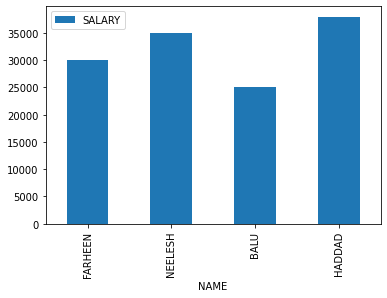

In [ ]:
# read the db data in dataframe form 
import pandas as pd 
qry = "SELECT * FROM LISRC"

data = pd.read_sql_query(qry,db)
print(data.shape)
print(data.head())
data.drop(['ID','AGE'],axis=1,inplace=True)
print(data)
data.plot(kind = 'bar',x='NAME')


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
dat = pd.read_csv('/gdrive/MyDrive/Mall_Customers.csv')
print(dat.columns)
print(dat.head())

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
def psh_data_DB(cusID,gen,age,annIncome,spendingScore):
  db1= sqlite3.connect('/gdrive/MyDrive/MALLDB.db')
  qry = "INSERT into MALL_DB(CustomerID,Genre,Age,AnnualIncome,SpendingScore) \
        VALUES('{}','{}','{}','{}','{}')".format(cusID,gen,age,annIncome,spendingScore)
  db1.execute(qry)
  db1.commit()

In [ ]:
import sqlite3
# create the table 
db1 = sqlite3.connect("/gdrive/MyDrive/MALLDB.db")
cmd = "CREATE TABLE MALL_DB4 (CustomerID INT, Genre TEXT, Age INT,AnnualIncome REAL,SpendingScore INT);"
db1.execute(cmd)

In [ ]:
psh_data_DB(1,'M',34,20000,8)


In [ ]:
db.close()

In [ ]:
rows,cols=dat.shape
# print(rows)
# print(cols)

CustomerID = ""
Genre = ""
Age = 0
AnnualIncome = 0
SpendingScore = 0

for i in range(rows):
  CustomerID = dat['CustomerID'][i]
  Genre = dat['Genre'][i]
  Age = dat['Age'][i]
  AnnualIncome = dat['Annual Income'][i]
  SpendingScore = dat['Spending Score'][i]
  if Genre == 'Male':
    Genre ='M'
  else:
    Genre ='F'
  psh_data_DB(CustomerID,Genre,Age,AnnualIncome,SpendingScore)

# print(CustomerID,Genre,Age,AnnualIncome,SpendingScore)

KeyError: ignored

In [ ]:
qry = "SELECT * FROM MALL_DB4"

d= pd.read_sql_query(qry,db1)
print(d.shape)
print(d.head())
print(d)


# fetch only those samples where , spending score is 
#more than 55

(0, 5)
Empty DataFrame
Columns: [CustomerID, Genre, Age, AnnualIncome, SpendingScore]
Index: []
Empty DataFrame
Columns: [CustomerID, Genre, Age, AnnualIncome, SpendingScore]
Index: []


In [ ]:
qry = "SELECT * FROM MALL_DB4 WHERE SpendingScore >55"
d= pd.read_sql_query(qry,db1)
print(d.shape)
print(d.head())
print(d)

(0, 5)
Empty DataFrame
Columns: [CustomerID, Genre, Age, AnnualIncome, SpendingScore]
Index: []
Empty DataFrame
Columns: [CustomerID, Genre, Age, AnnualIncome, SpendingScore]
Index: []
